Tests of ACF calculation:
* using my own written function (Pearson)
* using pearsonr from scipy (Siegle paper use it)
* using my own written function (ACF)
* using acf from statsmodels (I am using it in timescales)

Tests of ACF calculation vs length of the signal

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
os.chdir(os.path.expanduser("D:\\intr_timescales\\isttc\\scripts"))
from calculate_acf import acf_pearsonr, my_acf_pearsonr, my_acf

#### Loading test data 

In [2]:
project_folder = "Q:\\Personal\\Irina\\projects\\isttc\\"

nifty len 3322


,Close
Date,
2007-11-27,962.9
2007-11-28,893.9
2007-11-29,884.2


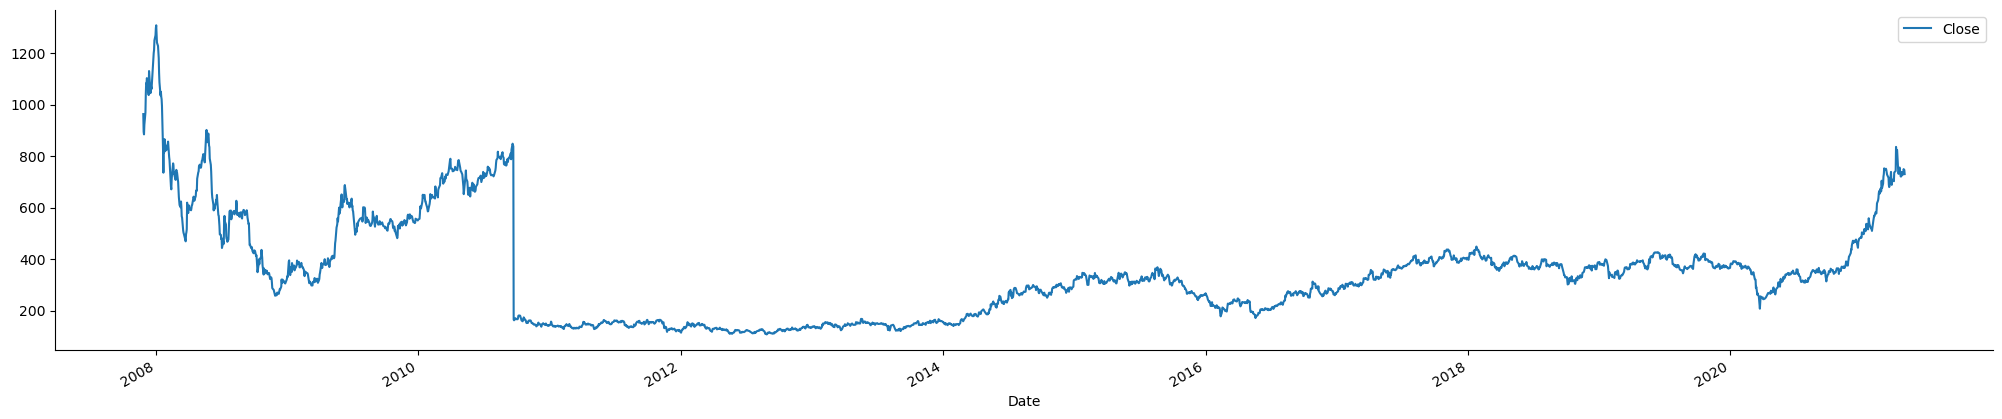

In [3]:
# indian stock market index
nifty = pd.read_csv(project_folder + 'nifty.csv',
                     usecols=['Date', "Close"],
                     parse_dates=['Date'])

nifty.set_index("Date", inplace=True) #setting "Date" as index
nifty.asfreq("b", method='ffill') #setting frequency to business days and filling missing days with previous values

nifty.plot(figsize=(25,5))
sns.despine()

print('nifty len {}'.format(len(nifty)))
nifty.head(3)

#### Calc for the full signal

In [4]:
acf_my = my_acf(nifty.iloc[:,0].values, n_lags_=10, verbose_=False)
acf_pearson = acf_pearsonr(nifty.iloc[:,0].values, n_lags_=10, verbose_=False)
acf_pearson_my = my_acf_pearsonr(nifty.iloc[:,0].values, n_lags_=10, verbose_=False)
acf_statstools = acf(nifty.iloc[:,0].values,nlags=10)

print('acf_my {}, \nacf_statstools {}, \nacf_my_pearson_style {} \nacf_my_pearsonr {}'.format(acf_my, acf_statstools, 
                                                                                              acf_pearson_my, acf_pearson))

acf_my [1.         0.99415236 0.98830437 0.98242585 0.97623761 0.97026137
 0.96384059 0.95703591 0.95032913 0.943514   0.93675867], 
acf_statstools [1.         0.99415236 0.98830437 0.98242585 0.97623761 0.97026137
 0.96384059 0.95703591 0.95032913 0.943514   0.93675867], 
acf_my_pearson_style [1.         0.99629284 0.99229802 0.98821361 0.98397931 0.98011499
 0.97615109 0.97205346 0.9679751  0.96389421 0.95979841] 
acf_my_pearsonr [1.         0.99629284 0.99229802 0.98821361 0.98397931 0.98011499
 0.97615109 0.97205346 0.9679751  0.96389421 0.95979841]


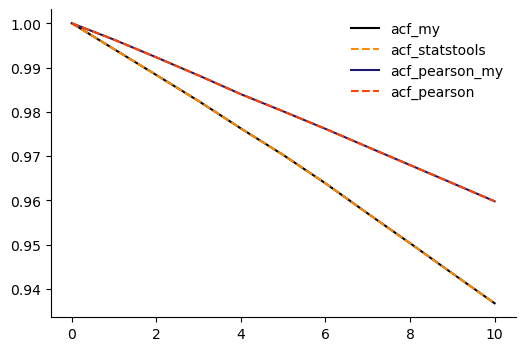

In [12]:
fig, axes = plt.subplots(1,1, figsize=(6,4))

t_lags = np.linspace(0,10,11)

axes.plot(t_lags, acf_my, label='acf_my', color='k')
axes.plot(t_lags, acf_statstools, label='acf_statstools', color='darkorange', linestyle='dashed')
axes.plot(t_lags, acf_pearson_my, label='acf_pearson_my', color='midnightblue')
axes.plot(t_lags, acf_pearson, label='acf_pearson', color='orangered', linestyle='dashed')

axes.legend(frameon=False)

sns.despine()

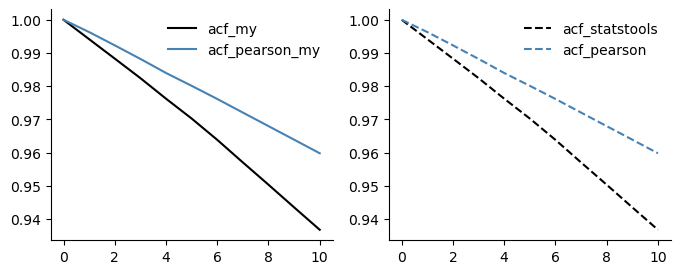

In [11]:
fig, axes = plt.subplots(1,2,figsize=(8,3))

axes[0].plot(t_lags, acf_my, label='acf_my', color='k')
axes[0].plot(t_lags, acf_pearson_my, label='acf_pearson_my', color='steelblue')

axes[1].plot(t_lags, acf_statstools, label='acf_statstools', color='k', linestyle='dashed')
axes[1].plot(t_lags, acf_pearson, label='acf_pearson', color='steelblue', linestyle='dashed')

axes[0].legend(frameon=False)
axes[1].legend(frameon=False)

sns.despine()

#### Calc with short sequence

In [7]:
pal_data_len = sns.color_palette('Greys', 12)

In [8]:
data_len_l = [10,20,30,40,50, 60, 70, 80, 90, 100, 1000]

In [9]:
acf_my_dict = {}

for data_len in data_len_l:
    data_subset = nifty.iloc[:data_len, 0].values
    acf_my_dict[data_len] = {'acf': my_acf(data_subset, n_lags_=10, verbose_=True)}

acf_my_dict['full_'+str(len(nifty))] = {'acf': acf_my}

n_lags (10) is >= signal length (10). Setting n_lags to 9...
Calc for lag 1, input length (10,)
y_mean = 1001.485, denominator = 64414.81525000006
shape numerator_p1 (9,), numerator_p2 (9,)
acf_lag 0.817242668797377
Calc for lag 2, input length (10,)
y_mean = 1001.485, denominator = 64414.81525000006
shape numerator_p1 (8,), numerator_p2 (8,)
acf_lag 0.4402639468875911
Calc for lag 3, input length (10,)
y_mean = 1001.485, denominator = 64414.81525000006
shape numerator_p1 (7,), numerator_p2 (7,)
acf_lag 0.04403386183739792
Calc for lag 4, input length (10,)
y_mean = 1001.485, denominator = 64414.81525000006
shape numerator_p1 (6,), numerator_p2 (6,)
acf_lag -0.29849817274761165
Calc for lag 5, input length (10,)
y_mean = 1001.485, denominator = 64414.81525000006
shape numerator_p1 (5,), numerator_p2 (5,)
acf_lag -0.46665298981820785
Calc for lag 6, input length (10,)
y_mean = 1001.485, denominator = 64414.81525000006
shape numerator_p1 (4,), numerator_p2 (4,)
acf_lag -0.457272794863756

In [13]:
acf_pearsonr_dict = {}

for data_len in data_len_l:
    data_subset = nifty.iloc[:data_len, 0].values
    acf_pearsonr_dict[data_len] = {'acf': acf_pearsonr(data_subset, n_lags_=10, verbose_=True)}

acf_pearsonr_dict['full_'+str(len(nifty))] = {'acf': acf_pearson}

n_lags (10) is >= signal length (10). Setting n_lags to 8...
Calc for lag 1, input length (10,)
Pearson correlation for lag 1: 0.8751860511690389
Calc for lag 2, input length (10,)
Pearson correlation for lag 2: 0.6745659421924753
Calc for lag 3, input length (10,)
Pearson correlation for lag 3: 0.4101236088894755
Calc for lag 4, input length (10,)
Pearson correlation for lag 4: -0.0014373603256204043
Calc for lag 5, input length (10,)
Pearson correlation for lag 5: -0.5375633015733626
Calc for lag 6, input length (10,)
Pearson correlation for lag 6: -0.5178424061515347
Calc for lag 7, input length (10,)
Pearson correlation for lag 7: -0.19964230948444406
Calc for lag 8, input length (10,)
Pearson correlation for lag 8: 1.0
Calc for lag 1, input length (20,)
Pearson correlation for lag 1: 0.8302750539988081
Calc for lag 2, input length (20,)
Pearson correlation for lag 2: 0.5693847852931562
Calc for lag 3, input length (20,)
Pearson correlation for lag 3: 0.44491409349103694
Calc for l

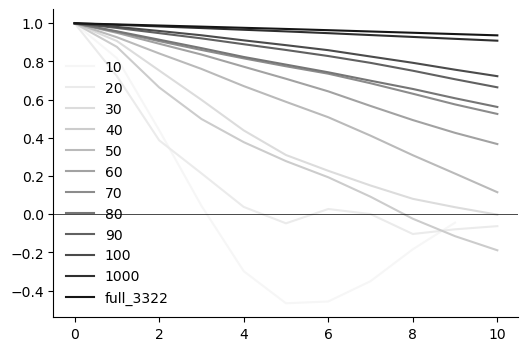

In [16]:
fig, axes = plt.subplots(1,1, figsize=(6,4))

t_lags = np.linspace(0,10,10+1)

i = 0
for k,v in acf_my_dict.items():
    if k == 10:
        axes.plot(t_lags[:-1], v['acf'], label=str(k), color=pal_data_len[i])
    else:
        axes.plot(t_lags, v['acf'], label=str(k), color=pal_data_len[i])
    i=i+1
axes.axhline(y=0, lw=0.5, c='k')

axes.legend(frameon=False)

sns.despine()

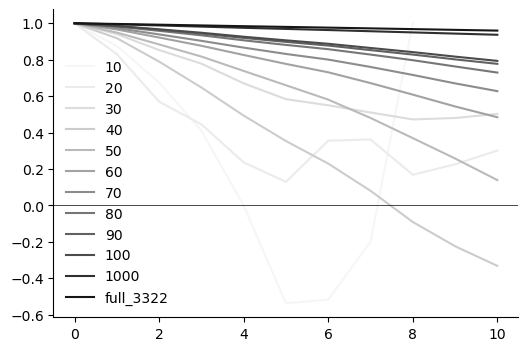

In [19]:
fig, axes = plt.subplots(1,1, figsize=(6,4))

t_lags = np.linspace(0,10,10+1)

i = 0
for k,v in acf_pearsonr_dict.items():
    if k == 10:
        axes.plot(t_lags[:-2], v['acf'], label=str(k), color=pal_data_len[i])
    else:
        axes.plot(t_lags, v['acf'], label=str(k), color=pal_data_len[i])
    i=i+1
axes.axhline(y=0, lw=0.5, c='k')

axes.legend(frameon=False)

sns.despine()